# Customer Segmentation with KMeans 🧑 👩 👨

- Stack 3 Week 1
- Name : Prakruti Sidram
- Due Date : Sep 16th 2022

## Import Libraries

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the Dataset

Your task is to `perform customer segmentation using KMeans`. 

- We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. 
- We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data here. The original data is from this data source.[data source](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

In [ ]:
#Load in data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTRP6OJWHIcA9gdpQ8H-B0mAfcFx7m3Dsw0K3Q61kL-NfOLtEvRAYmJ5omHRJ1beI7xjs6MbRnzn7MJ/pub?output=csv')

In [ ]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


### Cleanup 🧹

In [ ]:
# Dropping the first two columns

df.drop(['Unnamed: 0', 'Customer Id'],axis = 1, inplace = True)

In [ ]:
# Fill Missing Values with 0

df.fillna(0, inplace =True)

In [ ]:
# refining the columns we want to use in a new df

cust = df[['Age','Edu','Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]
cust.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [ ]:
# scale the data
scaled_df = StandardScaler().fit_transform(cust)
scaled_df

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Finding the optimum cluster size (k)

#### Metrics : Inertia & Silhouette Scores 🔍

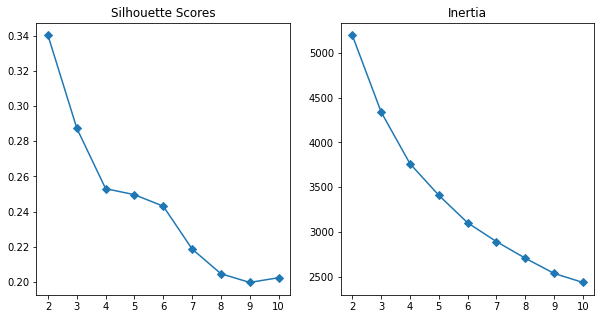

In [ ]:
from matplotlib import markers
# define a range of values for k to evaluate for inertia, fit and run the model, and plot the results
ks = range(2,11)
inertias = []
sils = []

for k in ks:
  km = KMeans(n_clusters = k, random_state=42)
  km.fit(scaled_df)
  inertias.append(km.inertia_)
  sils.append(silhouette_score(scaled_df, km.labels_))

# plot no of cluster & inertia & silhoutte scores
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(ks,sils, marker = 'D')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)

axes[1].plot(ks,inertias, marker = 'D')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);


k = 2 is the highest Silhouette Score 

#### Final Model with the optimum k and Clustering the Dataset

In [ ]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score

kmeans = KMeans(n_clusters=2).fit(scaled_df)

In [ ]:
# fit your model on your scaled data

# add the cluster labels as a column in df 
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
df.describe().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
count,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00
mean,35.03,1.71,8.57,46.68,1.58,3.08,0.22,10.17,0.79
std,8.04,0.93,6.78,38.54,2.13,3.40,0.41,6.72,0.41
min,20.00,1.00,0.00,13.00,0.01,0.05,0.00,0.10,0.00
25%,29.00,1.00,3.00,24.00,0.38,1.05,0.00,5.10,1.00
50%,34.00,1.00,7.00,35.00,0.88,2.00,0.00,8.70,1.00
75%,41.00,2.00,13.00,55.75,1.90,3.90,0.00,13.80,1.00
max,56.00,5.00,33.00,446.00,20.56,35.20,1.00,41.30,1.00


### Analysing the Clusters 🔺

In [ ]:
cluster_groups = df.groupby('cluster')
cluster_groups

In [ ]:
cluster_means = cluster_groups.mean().round(2)
cluster_means

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,42.56,1.97,16.05,94.54,3.97,7.49,0.23,14.20
1,33.01,1.64,6.56,33.82,0.94,1.89,0.21,9.09


In [ ]:
cluster_medians = cluster_groups.median()
cluster_medians

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,42.0,2.0,16.0,77.0,3.0270,6.5025,0.0,13.2
1,32.0,1.0,6.0,30.0,0.6385,1.5510,0.0,7.8


#### Visulaizing the clusters

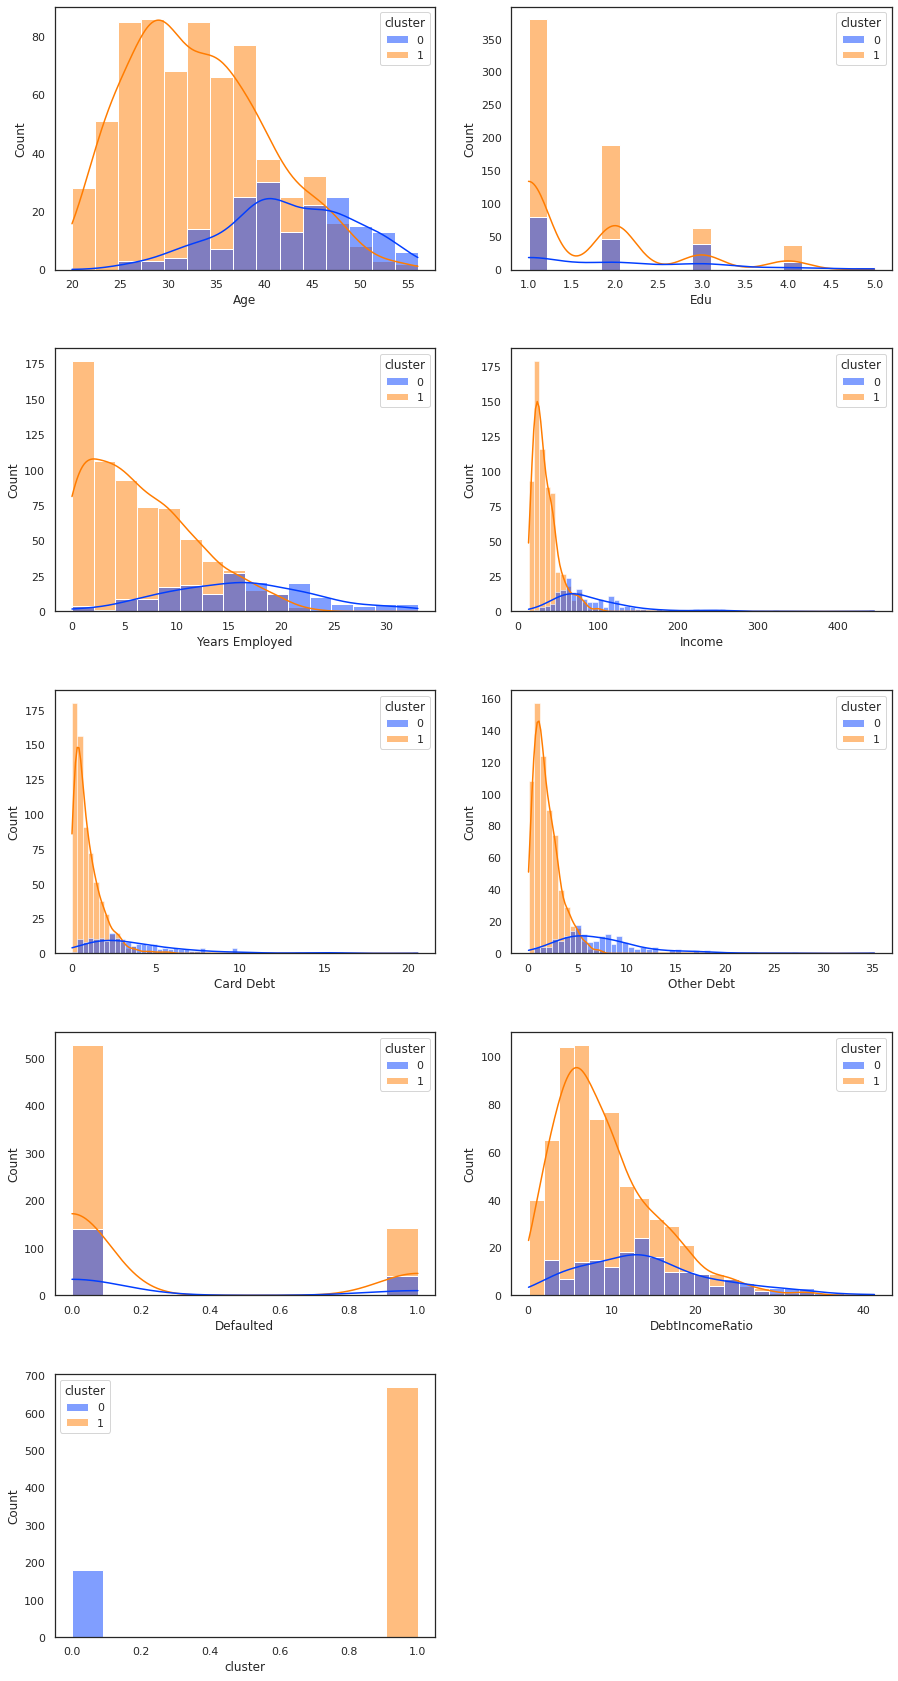

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,30
sns.set(font_scale = 1)
sns.set_style("white")
#color = sns.set_palette("bright")
plt.subplots_adjust(hspace=0.3)
i = 1;
for name in df:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name,hue = 'cluster',kde= True, palette= 'bright')
    i = i + 1

- Cluster 1 has the most datasets. So individuals in this cluster form the average or the mean of our datapoints. 

Correlations

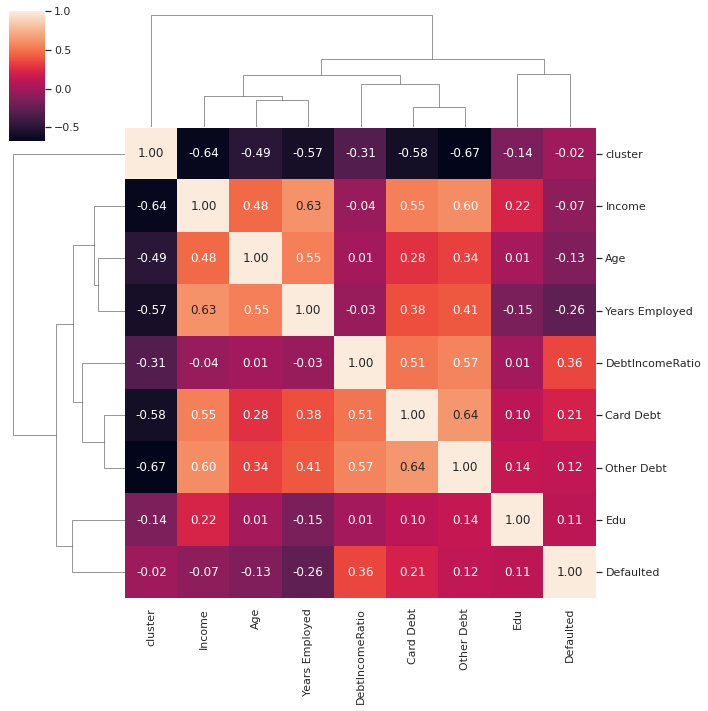

In [ ]:
corr = df.corr()
corr_features = corr.columns.tolist()
sns.clustermap(df[corr_features].corr(),
               annot = True,
               fmt = '.2f')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

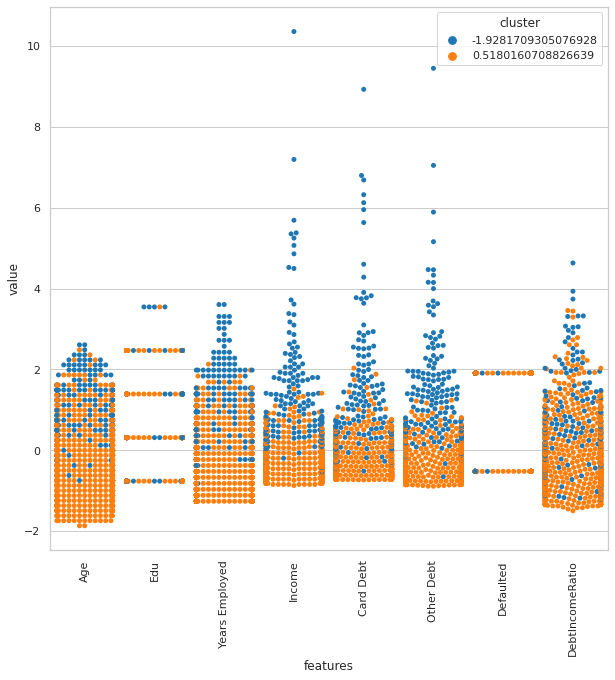

In [ ]:
sns.set(style="whitegrid", palette="tab10")
data = df
data_std = (data - data.mean()) /(data.std()) # standardizing dataset
data = pd.melt(data_std,id_vars="cluster",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="cluster", data=data);
plt.xticks(rotation=90)

`defaulted` and `Edu` Level Plot

Income Vs Age Scatterplots 

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x720 with 0 Axes>

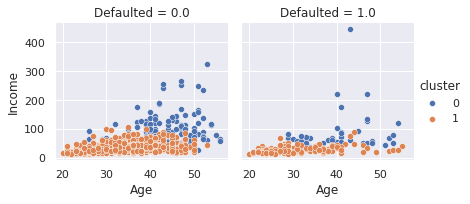

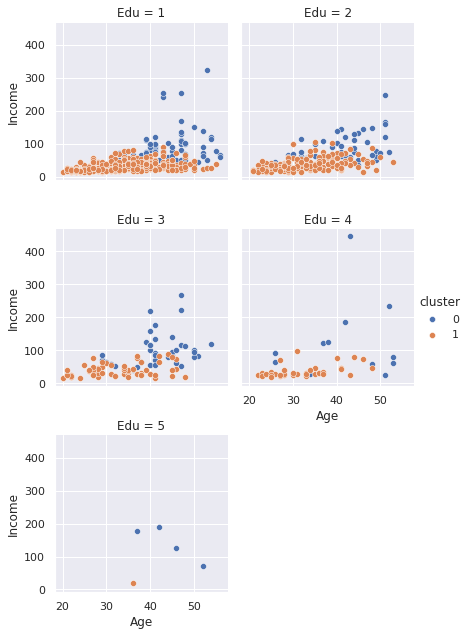

In [ ]:
plt.figure(figsize= (15,10))
sns.set(font_scale = 1)
grid = sns.FacetGrid(df, col= 'Defaulted', hue= 'cluster', col_wrap=2)
grid.map(sns.scatterplot,'Age','Income')
grid.add_legend()
grid.set_ylabels('Income')

grid = sns.FacetGrid(df, col= 'Edu', hue= 'cluster', col_wrap=2)
grid.map(sns.scatterplot,'Age','Income')
grid.add_legend()
plt.show

- Looks like Cluster 2 comprises primarily of Individuals who have `'defaulted'`

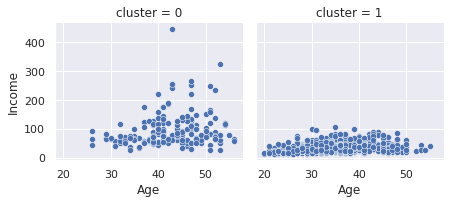

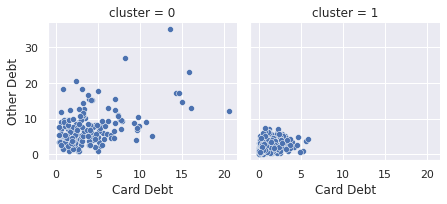

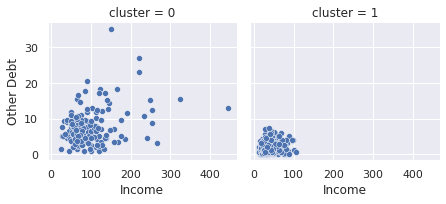

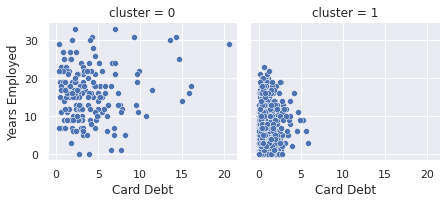

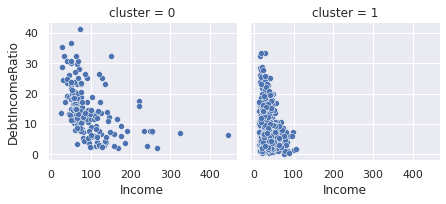

In [ ]:
#fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

sns.set(font_scale = 1)
grid = sns.FacetGrid(df, col= 'cluster', col_wrap=4)
grid.map(sns.scatterplot,'Age','Income')


sns.set(font_scale = 1)
grid = sns.FacetGrid(df, col= 'cluster', col_wrap=4)
grid.map(sns.scatterplot,'Card Debt','Other Debt')

sns.set(font_scale = 1)
grid = sns.FacetGrid(df, col= 'cluster', col_wrap=4)
grid.map(sns.scatterplot,'Income','Other Debt')

sns.set(font_scale = 1)
grid = sns.FacetGrid(df, col= 'cluster', col_wrap=4)
grid.map(sns.scatterplot,'Card Debt','Years Employed')
plt.show()

sns.set(font_scale = 1)
grid = sns.FacetGrid(df, col= 'cluster', col_wrap=4)
grid.map(sns.scatterplot,'Income','DebtIncomeRatio')
plt.show()

Cluster 3 is has a majority of individuals who 
  - Have High Income, Other Debt, Card Debt, Years Employed 
This cluster is a bit of the outliers or atleast fall above the 75th percentile of our dataset

In [ ]:
cluster_means

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,42.56,1.97,16.05,94.54,3.97,7.49,0.23,14.20
1,33.01,1.64,6.56,33.82,0.94,1.89,0.21,9.09


# Describe the clusters

- `0. Perfect Consumer` 
    - High Income
    - High Debt
    - Experienced 

- `1. Risk Averse Individual` 
    - Younger Age Group
    - Lower Income
    - Less tolerance for debt

